### Importing the necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize
import seaborn as sns
import requests

%matplotlib inline

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

### Import Census Data


In [3]:
# The code was removed by Watson Studio for sharing.

,NOME_UDH,ESPVIDA,T_ANALF18M,T_FREQ6A17,RDPC,P_FUND,P_MED,P_SUPER,REN0,RENOCUP,IDHM,IDHM_E,IDHM_L,IDHM_R,DISTRITO
0,Jardim Anália Franco / Vila Formosa : Hospital...,79.91,1.45,96.11,1801.17,83.89,70.22,31.00,0.89,2524.57,0.866,0.815,0.915,0.870,Vila Formosa
1,Vila Califórnia,80.04,1.29,98.10,2000.87,87.80,74.85,37.16,1.24,2599.58,0.870,0.809,0.917,0.887,Carrão
2,Vila Carrão / Vila Formosa : Cemitério Vila Fo...,77.05,2.22,96.50,890.75,74.98,53.96,12.56,1.15,1398.04,0.790,0.750,0.868,0.757,Carrão
3,Vila Formosa : Escola Municipal de Ensino Fund...,79.61,2.09,91.08,1233.65,76.97,56.83,17.48,2.03,1714.03,0.816,0.736,0.910,0.810,Vila Formosa
4,Aricanduva : Centro de Educação Infantil Coryn...,79.56,2.70,94.93,1180.17,82.71,57.48,21.37,0.95,1789.84,0.820,0.756,0.909,0.803,Aricanduva


### Change columns name to English

In [4]:
df_Census.drop(columns= ['NOME_UDH'], inplace=True)
columns_name = ['Life Expectancy','Iliteracy Rate','School Freq. Rate','Per Capita Income','% of Elementary School Degree','% of High School Degree', '% of College Degree', '% of no income', 'Household income', 'HDI', 'Education HDI','Health HDI','Income HDI','District Name']
df_Census.columns = columns_name
df_Census.head()

,Life Expectancy,Iliteracy Rate,School Freq. Rate,Per Capita Income,% of Elementary School Degree,% of High School Degree,% of College Degree,% of no income,Household income,HDI,Education HDI,Health HDI,Income HDI,District Name
0,79.91,1.45,96.11,1801.17,83.89,70.22,31.00,0.89,2524.57,0.866,0.815,0.915,0.870,Vila Formosa
1,80.04,1.29,98.10,2000.87,87.80,74.85,37.16,1.24,2599.58,0.870,0.809,0.917,0.887,Carrão
2,77.05,2.22,96.50,890.75,74.98,53.96,12.56,1.15,1398.04,0.790,0.750,0.868,0.757,Carrão
3,79.61,2.09,91.08,1233.65,76.97,56.83,17.48,2.03,1714.03,0.816,0.736,0.910,0.810,Vila Formosa
4,79.56,2.70,94.93,1180.17,82.71,57.48,21.37,0.95,1789.84,0.820,0.756,0.909,0.803,Aricanduva


### Group by District name

In [5]:
df_CensusGrouped = df_Census.groupby('District Name').mean()
df_CensusGrouped.head()

,Life Expectancy,Iliteracy Rate,School Freq. Rate,Per Capita Income,% of Elementary School Degree,% of High School Degree,% of College Degree,% of no income,Household income,HDI,Education HDI,Health HDI,Income HDI
District Name,,,,,,,,,,,,,
Alto de Pinheiros,81.640000,0.610000,96.210000,5207.070000,94.410000,89.340000,70.020000,1.310000,6474.970000,0.936000,0.870000,0.944000,1.000000
Anhanguera,72.767778,6.422222,92.704444,561.633333,62.257778,37.545556,5.527778,0.914444,1004.542222,0.713889,0.673556,0.796222,0.678667
Aricanduva,76.353846,4.421538,92.140000,1243.473077,72.158462,51.696154,18.118462,1.226923,1835.792308,0.776154,0.706769,0.855923,0.774615
Artur Alvim,76.147500,3.450000,93.063333,826.616667,70.170000,50.778333,13.875000,1.033333,1279.325833,0.760500,0.702250,0.852583,0.735500
Barra Funda,77.530000,5.500000,95.500000,2449.790000,78.090000,63.806667,38.766667,1.760000,3100.580000,0.839667,0.783333,0.875667,0.866667


### Histograms to understand the distribution

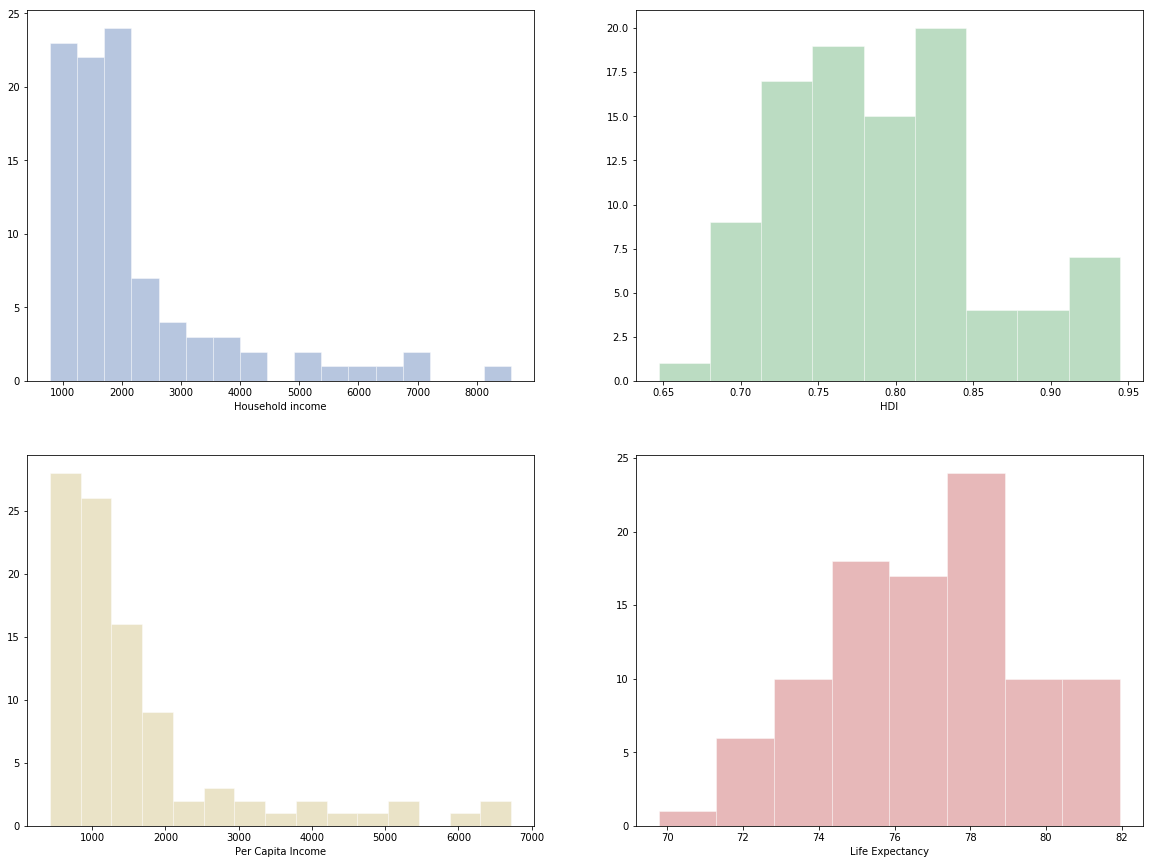

In [6]:
f, axes = plt.subplots(2, 2, figsize=(20,15))

sns.set()
sns.distplot(df_CensusGrouped['Household income'], color="b", label="Household income", kde=False, ax=axes[0,0])
sns.distplot(df_CensusGrouped['HDI'], color="g", label="HDI Distribution", kde=False, ax=axes[0,1])
sns.distplot(df_CensusGrouped['Life Expectancy'], color="r", label="Life Expectancy Distribution", kde=False, ax=axes[1,1])
sns.distplot(df_CensusGrouped['Per Capita Income'], color="y", label="Per Capita Income", kde=False, ax=axes[1,0])

### Load the coordinates for the districts

In [7]:
body = client_39d42b58dcb34ecba2092f9f64e895c6.get_object(Bucket='capstoneproject-donotdelete-pr-aiwwog2ieqv6a7',Key='Districts.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_coord = pd.read_csv(body, encoding = 'latin_1',decimal = ",", sep=";",header=0)
df_coord.drop(columns = ['Cood'], inplace =True)
df_coord.head()

,DISTRITO,Lat,Long
0,Cidade Tiradentes,-23.603240,-46.399874
1,Itaim Paulista,-23.468716,-46.403903
2,Guaianases,-23.571128,-46.411152
3,Vila Curuçá,-23.503012,-46.415271
4,Iguatemi,-23.617538,-46.418492


In [8]:
df_coord.set_index('DISTRITO', inplace = True)
df_coord.head()

,Lat,Long
DISTRITO,,
Cidade Tiradentes,-23.603240,-46.399874
Itaim Paulista,-23.468716,-46.403903
Guaianases,-23.571128,-46.411152
Vila Curuçá,-23.503012,-46.415271
Iguatemi,-23.617538,-46.418492


In [9]:
df_CensusCoord = df_CensusGrouped.join(df_coord, on = 'District Name')
df_CensusCoord.reset_index(inplace = True)
df_CensusCoord.head()

,District Name,Life Expectancy,Iliteracy Rate,School Freq. Rate,Per Capita Income,% of Elementary School Degree,% of High School Degree,% of College Degree,% of no income,Household income,HDI,Education HDI,Health HDI,Income HDI,Lat,Long
0,Alto de Pinheiros,81.640000,0.610000,96.210000,5207.070000,94.410000,89.340000,70.020000,1.310000,6474.970000,0.936000,0.870000,0.944000,1.000000,-23.551715,-46.710947
1,Anhanguera,72.767778,6.422222,92.704444,561.633333,62.257778,37.545556,5.527778,0.914444,1004.542222,0.713889,0.673556,0.796222,0.678667,-23.439103,-46.794675
2,Aricanduva,76.353846,4.421538,92.140000,1243.473077,72.158462,51.696154,18.118462,1.226923,1835.792308,0.776154,0.706769,0.855923,0.774615,-23.580207,-46.510704
3,Artur Alvim,76.147500,3.450000,93.063333,826.616667,70.170000,50.778333,13.875000,1.033333,1279.325833,0.760500,0.702250,0.852583,0.735500,-23.546768,-46.472861
4,Barra Funda,77.530000,5.500000,95.500000,2449.790000,78.090000,63.806667,38.766667,1.760000,3100.580000,0.839667,0.783333,0.875667,0.866667,-23.528119,-46.657129


### Create a map to check each district position

In [10]:
map_clusters = folium.Map(location=[-23.528119, -46.657129], zoom_start=11)

for lat, lon, poi in zip(df_CensusCoord['Lat'], df_CensusCoord['Long'], df_CensusCoord['District Name']):
    label = folium.Popup(str(poi))
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Use K-Mean to group the Districts by caracteristics

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Normalize and scale the relevant colummns

In [12]:
X = df_CensusCoord.values[:,1:14]
X_census = StandardScaler().fit_transform(X)
X_census

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.84686871, -1.76282174,  1.84983672, ...,  2.11330764,
         1.84546481,  2.45246132],
       [-1.55967856,  1.52632061, -0.37533331, ..., -0.76229473,
        -1.55928775, -1.25735816],
       [-0.18278435,  0.39413167, -0.73361743, ..., -0.27610474,
        -0.18379922, -0.14962241],
       ...,
       [ 0.29242087, -0.38824822,  1.03068498, ...,  0.23961198,
         0.29259045,  0.15614463],
       [ 0.35199812, -0.03713809, -0.4384562 , ...,  0.26563553,
         0.35428559,  0.50839789],
       [ 1.01666946, -1.18528834,  0.03831557, ...,  0.34045324,
         1.01475638,  0.50968068]])

In [13]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X_census)
labels = k_means.labels_
print(labels)

[1 2 3 3 0 0 0 2 3 0 0 3 0 0 0 3 3 2 0 0 3 2 3 2 1 3 3 0 2 2 2 3 1 2 3 3 3
 2 3 2 1 3 2 3 2 2 1 0 3 0 4 1 3 0 4 3 3 2 0 1 2 1 3 3 3 0 3 0 0 0 1 2 0 0
 3 0 3 3 2 3 0 3 0 3 2 3 3 3 2 0 1 0 2 0 0 0]


In [14]:
df_CensusCoord["Cluster"] = labels
df_CensusCoord.head()

,District Name,Life Expectancy,Iliteracy Rate,School Freq. Rate,Per Capita Income,% of Elementary School Degree,% of High School Degree,% of College Degree,% of no income,Household income,HDI,Education HDI,Health HDI,Income HDI,Lat,Long,Cluster
0,Alto de Pinheiros,81.640000,0.610000,96.210000,5207.070000,94.410000,89.340000,70.020000,1.310000,6474.970000,0.936000,0.870000,0.944000,1.000000,-23.551715,-46.710947,1
1,Anhanguera,72.767778,6.422222,92.704444,561.633333,62.257778,37.545556,5.527778,0.914444,1004.542222,0.713889,0.673556,0.796222,0.678667,-23.439103,-46.794675,2
2,Aricanduva,76.353846,4.421538,92.140000,1243.473077,72.158462,51.696154,18.118462,1.226923,1835.792308,0.776154,0.706769,0.855923,0.774615,-23.580207,-46.510704,3
3,Artur Alvim,76.147500,3.450000,93.063333,826.616667,70.170000,50.778333,13.875000,1.033333,1279.325833,0.760500,0.702250,0.852583,0.735500,-23.546768,-46.472861,3
4,Barra Funda,77.530000,5.500000,95.500000,2449.790000,78.090000,63.806667,38.766667,1.760000,3100.580000,0.839667,0.783333,0.875667,0.866667,-23.528119,-46.657129,0


### Check each cluster characteristics

In [15]:
df_CensusStatistics = df_CensusCoord.groupby("Cluster").mean()
df_CensusStatistics

,Life Expectancy,Iliteracy Rate,School Freq. Rate,Per Capita Income,% of Elementary School Degree,% of High School Degree,% of College Degree,% of no income,Household income,HDI,Education HDI,Health HDI,Income HDI,Lat,Long
Cluster,,,,,,,,,,,,,,,
0,78.694311,2.563760,93.606626,1850.069320,78.848160,62.971833,29.171191,1.370600,2410.728834,0.829276,0.764486,0.894970,0.835557,-23.557181,-46.624345
1,81.194502,1.265746,95.985430,4896.846924,92.120030,85.102079,61.854627,1.599074,5852.654137,0.923464,0.867709,0.936637,0.970019,-23.571132,-46.678140
2,73.627060,5.699621,92.415389,711.729763,61.584370,39.135626,7.831509,1.214390,1128.619754,0.716822,0.653118,0.810518,0.697142,-23.572927,-46.577435
3,76.249813,3.983600,92.787660,1127.929154,69.474971,50.001688,16.062826,1.410617,1613.628874,0.767913,0.702697,0.854241,0.756258,-23.545217,-46.612688
4,71.464265,7.732941,93.220882,511.386029,54.188676,30.571471,4.567059,4.078235,891.204118,0.676176,0.603118,0.774456,0.661559,-23.856525,-46.725004


**Cluster 0** Highest Education, Highest Income, Highest Health

**Cluster 1** Medium Education, Medium Income

**Cluster 2** Low Education, Low Income

**Cluster 3** Medium Education, High Income

**Cluster 4** Lowest Education, Lowest Income, Lowest Health

Reoorder by affuent level to 0,3,1,2,4 

In [16]:
ClusterMap = {1:0,0:1,3:2,2:3,4:4}
df_CensusGroupedOrdered = df_CensusCoord   
df_CensusGroupedOrdered['Cluster'] = df_CensusCoord['Cluster'].map(ClusterMap)
df_CensusGroupedOrdered.head()

,District Name,Life Expectancy,Iliteracy Rate,School Freq. Rate,Per Capita Income,% of Elementary School Degree,% of High School Degree,% of College Degree,% of no income,Household income,HDI,Education HDI,Health HDI,Income HDI,Lat,Long,Cluster
0,Alto de Pinheiros,81.640000,0.610000,96.210000,5207.070000,94.410000,89.340000,70.020000,1.310000,6474.970000,0.936000,0.870000,0.944000,1.000000,-23.551715,-46.710947,0
1,Anhanguera,72.767778,6.422222,92.704444,561.633333,62.257778,37.545556,5.527778,0.914444,1004.542222,0.713889,0.673556,0.796222,0.678667,-23.439103,-46.794675,3
2,Aricanduva,76.353846,4.421538,92.140000,1243.473077,72.158462,51.696154,18.118462,1.226923,1835.792308,0.776154,0.706769,0.855923,0.774615,-23.580207,-46.510704,2
3,Artur Alvim,76.147500,3.450000,93.063333,826.616667,70.170000,50.778333,13.875000,1.033333,1279.325833,0.760500,0.702250,0.852583,0.735500,-23.546768,-46.472861,2
4,Barra Funda,77.530000,5.500000,95.500000,2449.790000,78.090000,63.806667,38.766667,1.760000,3100.580000,0.839667,0.783333,0.875667,0.866667,-23.528119,-46.657129,1


In [17]:
df_CensusStatistics = df_CensusGroupedOrdered.groupby("Cluster").mean()
df_CensusStatistics

,Life Expectancy,Iliteracy Rate,School Freq. Rate,Per Capita Income,% of Elementary School Degree,% of High School Degree,% of College Degree,% of no income,Household income,HDI,Education HDI,Health HDI,Income HDI,Lat,Long
Cluster,,,,,,,,,,,,,,,
0,81.194502,1.265746,95.985430,4896.846924,92.120030,85.102079,61.854627,1.599074,5852.654137,0.923464,0.867709,0.936637,0.970019,-23.571132,-46.678140
1,78.694311,2.563760,93.606626,1850.069320,78.848160,62.971833,29.171191,1.370600,2410.728834,0.829276,0.764486,0.894970,0.835557,-23.557181,-46.624345
2,76.249813,3.983600,92.787660,1127.929154,69.474971,50.001688,16.062826,1.410617,1613.628874,0.767913,0.702697,0.854241,0.756258,-23.545217,-46.612688
3,73.627060,5.699621,92.415389,711.729763,61.584370,39.135626,7.831509,1.214390,1128.619754,0.716822,0.653118,0.810518,0.697142,-23.572927,-46.577435
4,71.464265,7.732941,93.220882,511.386029,54.188676,30.571471,4.567059,4.078235,891.204118,0.676176,0.603118,0.774456,0.661559,-23.856525,-46.725004


### Plot in a map with its clusters

In [18]:
map_clusters = folium.Map(location=[-23.528119, -46.657129], zoom_start=11)

x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(df_CensusGroupedOrdered['Lat'], df_CensusGroupedOrdered['Long'], df_CensusGroupedOrdered['District Name'], df_CensusGroupedOrdered['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

## Get FourSquare Data

In [53]:
CLIENT_ID = '1EFYGWFYF0C4ZEF0UOHIFB14WCIQ05JWHAHG1RZRDI1WH4JC' # your Foursquare ID
CLIENT_SECRET = 'VWFAYRWHZ2P4S4BFKWVE3FGRTRNWRWBUXSSKOVVM1W4KG5YA' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
radius = 2000

### List the schools related categories ID

In [20]:
Elementary_SchoolID= '4f4533804b9074f6e4fb0105'
Middle_SchoolID='4f4533814b9074f6e4fb0106'
Private_SchoolID='52e81612bcbc57f1066b7a46'

### Function to fetch the data in Foursquare API and return the number of venues found

In [54]:
def fetch_count(lag, log, categID):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&intent=browse&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, lag, log, VERSION, radius, LIMIT,categID)
    results = requests.get(url).json()
    venues = results['response']['venues']
    if len(venues) !=0:
        dataframe = json_normalize(venues)
        print("fetched")
        return dataframe['id'].count()    
    else:
        return 0

In [100]:
#url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&intent=browse&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, -23.551715, -46.710947, VERSION, radius, LIMIT,Elementary_SchoolID)
#results = requests.get(url).json()
#results


{'meta': {'code': 429,
  'errorType': 'quota_exceeded',
  'errorDetail': 'Quota exceeded',
  'requestId': '5eb7fa4b963d29001b72a0ba'},
 'response': {}}

In [55]:
df_Schools = df_CensusGroupedOrdered
df_Schools['N of Elementary Schools'] = 0
df_Schools['N of High Schools'] = 0
df_Schools['N of Private Schools'] = 0

### Loop and fetch the data throu the 3 types of Schools

In [56]:
for label, row in df_Schools.iterrows():
    df_Schools.loc[label,'N of Elementary Schools'] = fetch_count(row['Lat'], row['Long'], Elementary_SchoolID)
    
for label, row in df_Schools.iterrows():
    df_Schools.loc[label,'N of High Schools'] = fetch_count(row['Lat'], row['Long'], Middle_SchoolID)
    
for label, row in df_Schools.iterrows():
    df_Schools.loc[label,'N of Private Schools'] = fetch_count(row['Lat'], row['Long'], Private_SchoolID)
 

fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched
fetched


In [57]:
df_Schools.head()

,District Name,Life Expectancy,Iliteracy Rate,School Freq. Rate,Per Capita Income,% of Elementary School Degree,% of High School Degree,% of College Degree,% of no income,Household income,HDI,Education HDI,Health HDI,Income HDI,Lat,Long,Cluster,N of Elementary Schools,N of High Schools,N of Private Schools
0,Alto de Pinheiros,81.640000,0.610000,96.210000,5207.070000,94.410000,89.340000,70.020000,1.310000,6474.970000,0.936000,0.870000,0.944000,1.000000,-23.551715,-46.710947,0,5,5,3
1,Anhanguera,72.767778,6.422222,92.704444,561.633333,62.257778,37.545556,5.527778,0.914444,1004.542222,0.713889,0.673556,0.796222,0.678667,-23.439103,-46.794675,3,3,3,0
2,Aricanduva,76.353846,4.421538,92.140000,1243.473077,72.158462,51.696154,18.118462,1.226923,1835.792308,0.776154,0.706769,0.855923,0.774615,-23.580207,-46.510704,2,13,3,0
3,Artur Alvim,76.147500,3.450000,93.063333,826.616667,70.170000,50.778333,13.875000,1.033333,1279.325833,0.760500,0.702250,0.852583,0.735500,-23.546768,-46.472861,2,18,7,2
4,Barra Funda,77.530000,5.500000,95.500000,2449.790000,78.090000,63.806667,38.766667,1.760000,3100.580000,0.839667,0.783333,0.875667,0.866667,-23.528119,-46.657129,1,16,9,4


### Get children and teenager population

In [72]:
body = client_39d42b58dcb34ecba2092f9f64e895c6.get_object(Bucket='capstoneproject-donotdelete-pr-aiwwog2ieqv6a7',Key='Censo Pop.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_pop = pd.read_csv(body, encoding = 'latin_1',sep=";",header=0)
df_pop.head()

,NOME_UDH,PESO617,DISTRITO
0,Cidade Quarto Centenário : Escola Municipal de...,NaN,NaN
1,Jardim Anália Franco / Vila Formosa : Hospital...,2762.0,Vila Formosa
2,Vila Califórnia,2832.0,Carrão
3,Vila Carrão / Vila Formosa : Cemitério Vila Fo...,1400.0,Carrão
4,Vila Formosa : Escola Municipal de Ensino Fund...,4045.0,Vila Formosa


In [73]:
df_pop.drop(columns= ['NOME_UDH'], inplace=True)
df_pop.columns = ['Population','District Name']
df_popGrouped = df_pop.groupby('District Name').sum()
df_popGrouped.head()

,Population
District Name,
Alto de Pinheiros,4794.0
Anhanguera,14629.0
Aricanduva,14100.0
Artur Alvim,16982.0
Barra Funda,2759.0


In [74]:
df_schoolsPop = df_Schools.join(df_popGrouped, on = 'District Name')
df_schoolsPop['Elementary Schools Conc'] = 1000*df_schoolsPop['N of Elementary Schools']/df_schoolsPop['Population']
df_schoolsPop['High Schools Conc'] = 1000*df_schoolsPop['N of High Schools']/df_schoolsPop['Population']
df_schoolsPop['Private Schools Conc'] = 1000*df_schoolsPop['N of Private Schools']/df_schoolsPop['Population']
df_schoolsPop.head()

,District Name,Life Expectancy,Iliteracy Rate,School Freq. Rate,Per Capita Income,% of Elementary School Degree,% of High School Degree,% of College Degree,% of no income,Household income,...,Lat,Long,Cluster,N of Elementary Schools,N of High Schools,N of Private Schools,Population,Elementary Schools Conc,High Schools Conc,Private Schools Conc
0,Alto de Pinheiros,81.640000,0.610000,96.210000,5207.070000,94.410000,89.340000,70.020000,1.310000,6474.970000,...,-23.551715,-46.710947,0,5,5,3,4794.0,1.042970,1.042970,0.625782
1,Anhanguera,72.767778,6.422222,92.704444,561.633333,62.257778,37.545556,5.527778,0.914444,1004.542222,...,-23.439103,-46.794675,3,3,3,0,14629.0,0.205072,0.205072,0.000000
2,Aricanduva,76.353846,4.421538,92.140000,1243.473077,72.158462,51.696154,18.118462,1.226923,1835.792308,...,-23.580207,-46.510704,2,13,3,0,14100.0,0.921986,0.212766,0.000000
3,Artur Alvim,76.147500,3.450000,93.063333,826.616667,70.170000,50.778333,13.875000,1.033333,1279.325833,...,-23.546768,-46.472861,2,18,7,2,16982.0,1.059946,0.412201,0.117772
4,Barra Funda,77.530000,5.500000,95.500000,2449.790000,78.090000,63.806667,38.766667,1.760000,3100.580000,...,-23.528119,-46.657129,1,16,9,4,2759.0,5.799203,3.262051,1.449801


## Cluster based on number or schools

In [75]:
X_schools = df_schoolsPop.values[:,-3:]
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X_schools)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 3 4 0 2 4 0 2 4 4 0 2 2 2 0 2 2 2 0 2 1 0 2 2 2 2 2 0 0 2 2 2 4
 2 2 2 3 2 2 2 2 2 0 3 2 0 2 0 4 0 2 0 2 2 0 0 2 3 2 0 2 3 2 2 4 0 0 2 0 4
 2 2 2 2 2 3 0 2 0 2 2 0 0 2 0 2 3 0 2 0 0 4]


In [76]:
df_schoolsPop["School Cluster"] = labels

### Check the statistics of each cluster

In [77]:
columns_name2 = ['Life Expectancy','Iliteracy Rate','School Freq. Rate','Per Capita Income','% of Elementary School Degree','% of High School Degree', '% of College Degree', '% of no income', 'Household income', 'HDI', 'Education HDI','Health HDI','Income HDI','Lat','Long','Cluster','Population', 'N of Elementary Schools', 'N of High Schools', 'N of Private Schools']
df_SchoolStatistics = df_schoolsPop.drop(columns=columns_name2).groupby("School Cluster").mean()
df_SchoolStatistics

,Elementary Schools Conc,High Schools Conc,Private Schools Conc
School Cluster,,,
0,0.972319,0.609205,0.353792
1,5.066078,2.771277,2.435277
2,0.286388,0.219133,0.072290
3,1.945654,1.203157,2.176502
4,1.407719,1.645191,0.647144


**Cluster 0** High number of Public schools

**Cluster 1** Medium number of schools 

**Cluster 2** Medium+ number of schools 

**Cluster 3** High number of private Schools and public schools

**Cluster 4** Lowest number of schools

Reoorder by affuent level to 3,0,2,1, 4

In [78]:
ClusterMap2 = {1:0,3:1,4:2,0:3,2:4}
df_SchoolsOrdered = df_schoolsPop
df_SchoolsOrdered['School Cluster'] = df_schoolsPop['School Cluster'].map(ClusterMap2)
df_SchoolsOrdered.head()

,District Name,Life Expectancy,Iliteracy Rate,School Freq. Rate,Per Capita Income,% of Elementary School Degree,% of High School Degree,% of College Degree,% of no income,Household income,...,Long,Cluster,N of Elementary Schools,N of High Schools,N of Private Schools,Population,Elementary Schools Conc,High Schools Conc,Private Schools Conc,School Cluster
0,Alto de Pinheiros,81.640000,0.610000,96.210000,5207.070000,94.410000,89.340000,70.020000,1.310000,6474.970000,...,-46.710947,0,5,5,3,4794.0,1.042970,1.042970,0.625782,3
1,Anhanguera,72.767778,6.422222,92.704444,561.633333,62.257778,37.545556,5.527778,0.914444,1004.542222,...,-46.794675,3,3,3,0,14629.0,0.205072,0.205072,0.000000,4
2,Aricanduva,76.353846,4.421538,92.140000,1243.473077,72.158462,51.696154,18.118462,1.226923,1835.792308,...,-46.510704,2,13,3,0,14100.0,0.921986,0.212766,0.000000,3
3,Artur Alvim,76.147500,3.450000,93.063333,826.616667,70.170000,50.778333,13.875000,1.033333,1279.325833,...,-46.472861,2,18,7,2,16982.0,1.059946,0.412201,0.117772,3
4,Barra Funda,77.530000,5.500000,95.500000,2449.790000,78.090000,63.806667,38.766667,1.760000,3100.580000,...,-46.657129,1,16,9,4,2759.0,5.799203,3.262051,1.449801,0


In [79]:
df_SchoolStatistics = df_SchoolsOrdered.drop(columns=columns_name2).groupby("School Cluster").mean()
df_SchoolStatistics

,Elementary Schools Conc,High Schools Conc,Private Schools Conc
School Cluster,,,
0,5.066078,2.771277,2.435277
1,1.945654,1.203157,2.176502
2,1.407719,1.645191,0.647144
3,0.972319,0.609205,0.353792
4,0.286388,0.219133,0.072290


### Plot in a map each School Cluster

In [80]:
map_clusters = folium.Map(location=[-23.528119, -46.657129], zoom_start=11)

x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(df_SchoolsOrdered['Lat'], df_SchoolsOrdered['Long'], df_SchoolsOrdered['District Name'], df_SchoolsOrdered['School Cluster']):
    label = folium.Popup(str(poi) + ' School Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

## Relation btween clusters

### Clean the DataFrame a little

In [81]:
columns_name3 = ['Life Expectancy','Iliteracy Rate','School Freq. Rate','Per Capita Income','% of Elementary School Degree','% of High School Degree', '% of College Degree', '% of no income', 'Household income', 'HDI', 'Education HDI','Health HDI','Income HDI','Lat','Long','N of Elementary Schools','N of High Schools','N of Private Schools','Population','Elementary Schools Conc', 'High Schools Conc','Private Schools Conc']
df_custerComp = df_schoolsPop.drop(columns=columns_name3)
df_custerComp.rename(columns={'Cluster':'Development Cluster'}, inplace=True)
df_custerComp.head()

,District Name,Development Cluster,School Cluster
0,Alto de Pinheiros,0,3
1,Anhanguera,3,4
2,Aricanduva,2,3
3,Artur Alvim,2,3
4,Barra Funda,1,0


### Count the number of districs on each combination of clusters

In [82]:
Cluster_matrix = pd.DataFrame([[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])
Cluster_matrix.head()

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [83]:
for x in range(5):
    for y in range(5):
         Cluster_matrix.iloc[x,y] = len(df_custerComp[(df_custerComp['School Cluster']==x ) & (df_custerComp['Development Cluster']==y)])

In [84]:
Cluster_matrix

,0,1,2,3,4
0,1,1,0,0,0
1,3,3,1,0,0
2,0,7,2,0,0
3,6,13,9,2,0
4,0,5,22,19,2


### Remembering the characteristics of each cluster

| Number      | Social Cluster | School Cluster |
| :----: | :----: |:----: |
| 0    | Highest Education, Highest Income, Highest Health       | High number of private Schools and public schools
| 1   | Medium Education, High Income        | High number of Public schools
| 2     | Medium Education, Medium Income       |Medium+ number of schools 
| 3   | Low Education, Low Income        |Medium number of schools
| 3   | Lowest Education, Lowest Income, Lowest Health        |Lowest number of schools


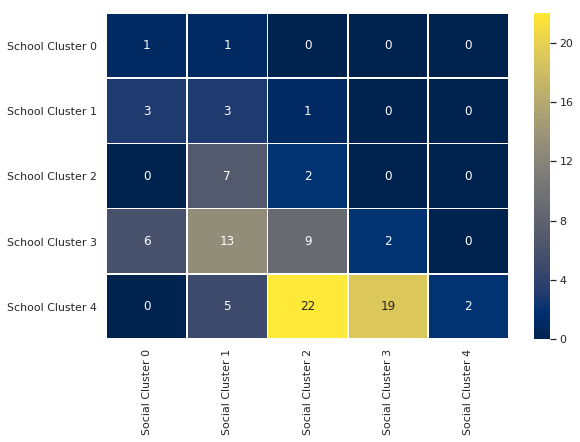

In [85]:
sns.set()
f, ax = plt.subplots(figsize=(9, 6))
x_axis_labels = ['Social Cluster 0','Social Cluster 1','Social Cluster 2','Social Cluster 3', 'Social Cluster 4']
y_axis_labels = ['School Cluster 0','School Cluster 1','School Cluster 2','School Cluster 3', 'School Cluster 4']
sns.heatmap(Cluster_matrix, annot=True, fmt="d", linewidths=.5, ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap ='cividis')

In [86]:
df_Out03 = df_custerComp[(df_custerComp['School Cluster']==3 ) & (df_custerComp['Development Cluster']==0)]
df_Out03

,District Name,Development Cluster,School Cluster
0,Alto de Pinheiros,0,3
32,Itaim Bibi,0,3
46,Lapa,0,3
51,Moema,0,3
59,Perdizes,0,3
70,Santo Amaro,0,3


In [91]:
df_Out13 = df_custerComp[(df_custerComp['School Cluster']==4 ) & (df_custerComp['Development Cluster']==1)]
df_Out13

,District Name,Development Cluster,School Cluster
19,Casa Verde,1,4
27,Freguesia do Ó,1,4
67,Sacomã,1,4
75,São Lucas,1,4
89,Vila Maria,1,4


In [94]:
df_custerComp

,District Name,Development Cluster,School Cluster
0,Alto de Pinheiros,0,3
1,Anhanguera,3,4
2,Aricanduva,2,3
3,Artur Alvim,2,3
4,Barra Funda,1,0
5,Bela Vista,1,1
6,Belém,1,2
7,Bom Retiro,3,3
8,Brasilândia,2,4
9,Brás,1,2


,District Name,Development Cluster,School Cluster


,District Name,Development Cluster,School Cluster
